3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
1.6.2


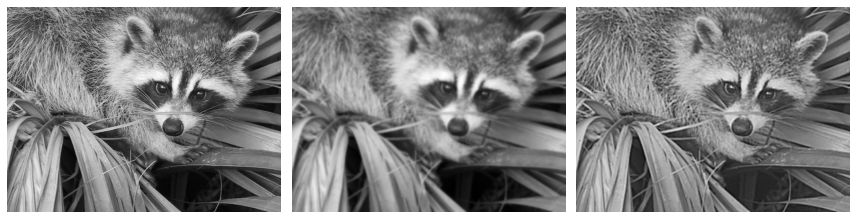

In [1]:
import scipy
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt
import sys

print(sys.version)

print(scipy.__version__)

f = scipy.misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(f, 3)

filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

208
114


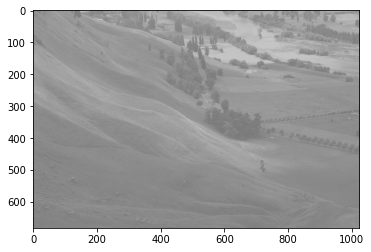

255
0


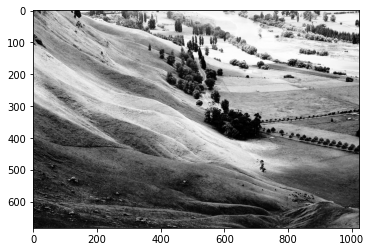

255
1


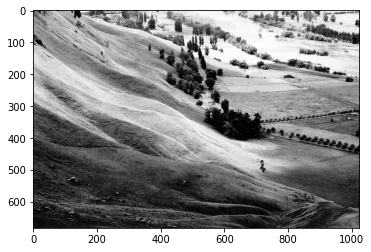

In [26]:
import numpy as np
from mlutils import imread

img_path = 'he.jpg'
img = imread(img_path)
nbins = 255

def he(img):
    img_flat = img.reshape(-1)
    hist, bins = np.histogram(img_flat, nbins)
    cdf = np.cumsum(hist)
    cdf = 255 * cdf / cdf[-1]
    bins = bins[1:]

    output = np.interp(img_flat, bins, cdf)
    output = output.reshape(img.shape)
    return output

img = img.astype(np.int)
print(img.max())
print(img.min())
plt.imshow(img, cmap='gray')
plt.show()

output = he(img)
output = output.astype(np.int)
print(output.max())
print(output.min())
plt.imshow(output, cmap='gray')
plt.show()

output = he(output)
output = output.astype(np.int)
print(output.max())
print(output.min())
plt.imshow(output, cmap='gray')
plt.show()